In [1]:
import tensorflow as tf
import numpy as np 
import pandas as pd 
import seaborn as sns 
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

# Function to convert

In [2]:
def cels_to_fahr(cels):
    return 1.8*cels + 32

In [3]:
# change 10000 to something smaller (e.g. 500) if not running on Cloud Notebook
celsius_train = 100*np.random.rand(10000, 1)
fahrenheit_train = np.apply_along_axis(cels_to_fahr, 0, celsius_train)

# Setup neural network layer

In [5]:
layer_0 = tf.keras.layers.Dense(units=1, input_shape=[1])

# Initialize the model & setup layer

In [6]:
model = tf.keras.Sequential([layer_0])
learn_rate = 0.1
epoch=500
model.compile(loss='mean_squared_error',
             optimizer=tf.keras.optimizers.Adam(learn_rate))

# Train the model

In [7]:
trained_model = model.fit(celsius_train, fahrenheit_train, epochs=epoch, verbose=False)

# Plot using seaborn
Seaborn expects a dataframe

In [11]:
loss = trained_model.history['loss']
epoch_label = [x for x in range(epoch)]
loss_df = pd.DataFrame(list(zip(loss, epoch_label)), columns=['Loss', 'Epoch'])

In [12]:
loss_df

,Loss,Epoch
0,4.669501e+02,0
1,7.347101e+01,1
2,1.868349e+01,2
3,3.029449e+00,3
4,3.036279e-01,4
...,...,...
495,2.154834e-05,495
496,2.810372e-01,496
497,2.905755e-08,497
498,1.062450e-09,498


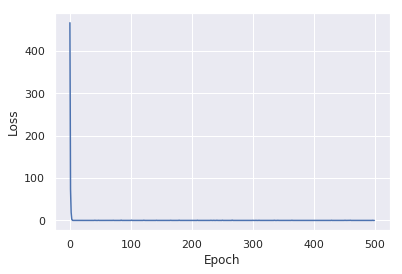

In [13]:
sns.set(style="darkgrid")
sns.lineplot(x="Epoch", y="Loss", data=loss_df)